# Generalized Metropolis Projection

In [91]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tqdm

## Produce Random Ergodic Random Walk

In [105]:
def rand_connected_graph(n, p):    
    while True:
        rand_matrix = np.random.rand(n,n)
        rand_adj_matrix = (rand_matrix < np.sqrt(p))
        rand_sym_adj_matrix = np.logical_and(rand_adj_matrix, rand_adj_matrix.T).astype(int)
        
        # Ensure irreducible (equivalently, graph is connected)
        if nx.is_connected(nx.from_numpy_matrix(rand_sym_adj_matrix)):
            # Ensure aperiodic (equivalently, one state is aperiodic if Markov chain is irreducible)
            # https://stats.stackexchange.com/questions/143948/aperiodicity-in-markov-chain
            rand_sym_adj_matrix[0][0] = 1
            
            return rand_sym_adj_matrix

def rand_kernel_matrix(n, p):
    rand_adj_matrix = rand_connected_graph(n,p)
    return np.divide(rand_adj_matrix, np.sum(rand_adj_matrix, axis=-1).repeat(n).reshape(n,n))

In [106]:
rand_connected_graph(10, 0.5)

array([[1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 1, 0, 1, 1, 0]])

In [107]:
K = rand_kernel_matrix(10, 0.5)

In [108]:
K

array([[0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ],
       [0.2       , 0.        , 0.2       , 0.        , 0.2       ,
        0.        , 0.        , 0.2       , 0.2       , 0.        ],
       [0.        , 0.16666667, 0.        , 0.16666667, 0.16666667,
        0.16666667, 0.16666667, 0.        , 0.        , 0.16666667],
       [0.        , 0.        , 0.2       , 0.2       , 0.2       ,
        0.        , 0.2       , 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.33333333, 0.33333333, 0.        ],
       [0.16666667, 0.        , 0.        , 0.16666667, 0.16666667,
        0.        , 0.16666667, 0.        , 0.16666667, 0.16666667],
       [0.        , 0.        , 0.3333333

## Calculate Spectral Properties

In [109]:
L = K - np.identity(10)

In [110]:
L

array([[-0.66666667,  0.        ,  0.33333333,  0.        ,  0.        ,
         0.        ,  0.33333333,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.66666667,  0.        ,  0.33333333,  0.        ,
         0.        ,  0.        ,  0.        ,  0.33333333,  0.        ],
       [ 0.2       ,  0.        , -0.8       ,  0.        ,  0.2       ,
         0.        ,  0.        ,  0.2       ,  0.2       ,  0.        ],
       [ 0.        ,  0.16666667,  0.        , -0.83333333,  0.16666667,
         0.16666667,  0.16666667,  0.        ,  0.        ,  0.16666667],
       [ 0.        ,  0.        ,  0.2       ,  0.2       , -0.8       ,
         0.        ,  0.2       ,  0.2       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.33333333,  0.        ,
        -1.        ,  0.        ,  0.33333333,  0.33333333,  0.        ],
       [ 0.16666667,  0.        ,  0.        ,  0.16666667,  0.16666667,
         0.        , -0.83333333,  0.        

In [111]:
np.sort(-np.linalg.eigvals(L.T))

array([-0.        ,  0.39087713,  0.46146426,  0.56954681,  0.79061917,
        0.89499263,  0.91330675,  1.14742952,  1.31722871,  1.58120169])

In [112]:
np.linalg.eig(L.T)

(array([ 0.        , -1.58120169, -1.31722871, -0.39087713, -0.46146426,
        -0.56954681, -1.14742952, -0.79061917, -0.89499263, -0.91330675]),
 array([[ 0.21650635,  0.09807672, -0.26172919,  0.32107554,  0.32585629,
         -0.47648368, -0.08860441,  0.07199563,  0.38168686, -0.09374421],
        [ 0.21650635, -0.16320938,  0.05050333, -0.32454937, -0.40583767,
         -0.31840522, -0.31477676,  0.40969264,  0.05107872,  0.16680478],
        [ 0.36084392, -0.29860411,  0.36040873,  0.55093009, -0.07098776,
         -0.07335281,  0.39389595,  0.03236554, -0.10516553,  0.57305251],
        [ 0.4330127 ,  0.40800582,  0.16623777, -0.47006   ,  0.04398372,
          0.26055124,  0.65484538,  0.27671453,  0.45827345, -0.14327338],
        [ 0.36084392, -0.16796999, -0.50237742,  0.22941651,  0.05970995,
          0.4958062 , -0.01512757,  0.5272767 , -0.38061718, -0.19815398],
        [ 0.21650635, -0.51991033, -0.09145169, -0.00961008, -0.25488007,
          0.20022496, -0.03289797

In [113]:
def spectral_gap(L, n):
    eigvals = np.linalg.eigvals(L.T)
    return np.sort(-eigvals)[1]

In [114]:
gamma = spectral_gap(L, 10)

In [115]:
gamma

0.39087713476683505

In [116]:
def uniform_distribution(n):
    return np.ones(n) / n

def random_distribution(n):
    arr = np.random.rand(n) * n
    return arr / np.sum(arr)

In [117]:
target = random_distribution(10)

In [118]:
target

array([0.13098046, 0.0650051 , 0.31630812, 0.02270509, 0.0203919 ,
       0.15085895, 0.08423434, 0.07612305, 0.04734968, 0.08604332])

In [119]:
np.sum(target)

1.0

In [120]:
def metropolis_projected_generator(L, target, n, phi='tv'):
    PI = np.repeat(target, n).reshape(n,n)
    r = np.nan_to_num(np.divide(PI.T, PI) * np.divide(L.T, L), 0)

    if phi == 'tv':
        correction = np.minimum(np.ones((n,n)), r)
    elif phi == 'chi':
        correction = 2/(1+1/r)
    elif phi == 'kl':
        correction = np.sqrt(r)
    else:
        raise ValueError("unsupported phi")
    
    off_diag = correction * L
    off_diag -= np.diag(np.diag(off_diag))
    
    row_sum = np.sum(off_diag, axis=-1)
    
    return off_diag - np.diag(row_sum)

In [121]:
L_tilde = metropolis_projected_generator(L, target, 10, phi='tv')

<ipython-input-120-e6e971544815>:3: RuntimeWarning: invalid value encountered in true_divide
  r = np.nan_to_num(np.divide(PI.T, PI) * np.divide(L.T, L), 0)


In [122]:
L_tilde

array([[-0.44051769,  0.        ,  0.33333333,  0.        ,  0.        ,
         0.        ,  0.10718436,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.2038935 ,  0.        ,  0.05821361,  0.        ,
         0.        ,  0.        ,  0.        ,  0.14567989,  0.        ],
       [ 0.13803045,  0.        , -0.26108346,  0.        ,  0.01289369,
         0.        ,  0.        ,  0.08022035,  0.02993896,  0.        ],
       [ 0.        ,  0.16666667,  0.        , -0.83333333,  0.16666667,
         0.16666667,  0.16666667,  0.        ,  0.        ,  0.16666667],
       [ 0.        ,  0.        ,  0.2       ,  0.18557276, -0.78557276,
         0.        ,  0.2       ,  0.2       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.02508424,  0.        ,
        -0.25605685,  0.        ,  0.16819917,  0.06277344,  0.        ],
       [ 0.16666667,  0.        ,  0.        ,  0.04492445,  0.04841707,
         0.        , -0.53909855,  0.        

In [123]:
np.max(-np.diag(L_tilde))

0.8333333333333333

In [149]:
def normalize_generator(L_tilde, n):
    c = np.maximum(np.max(-np.diag(L_tilde)), 1)
    print('c:', c)
    return L_tilde / c

In [189]:
n = 100
L = rand_kernel_matrix(n, 0.05) - np.identity(n)
target = random_distribution(n)
print(spectral_gap(metropolis_projected_generator(L, target, n, phi='tv'), n))
print(spectral_gap(metropolis_projected_generator(L, target, n, phi='chi'), n))
print(spectral_gap(metropolis_projected_generator(L, target, n, phi='kl'), n))

print(spectral_gap(normalize_generator(metropolis_projected_generator(L, target, n, phi='tv'), n), n))
print(spectral_gap(normalize_generator(metropolis_projected_generator(L, target, n, phi='chi'), n), n))
print(spectral_gap(normalize_generator(metropolis_projected_generator(L, target, n, phi='kl'), n), n))

0.014642262819846232
0.028743504999923356
0.10989829155102052
c: 1.0
0.014642262819846232
c: 1.8012440099272042
0.015957585336306014
c: 6.4617732586197025
0.017007450919826545


<ipython-input-120-e6e971544815>:3: RuntimeWarning: invalid value encountered in true_divide
  r = np.nan_to_num(np.divide(PI.T, PI) * np.divide(L.T, L), 0)
<ipython-input-120-e6e971544815>:8: RuntimeWarning: divide by zero encountered in true_divide
  correction = 2/(1+1/r)


In [194]:
np.diag(L)

array([-0.85714286, -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -0.85714286, -0.66666667,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.8       , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.85714286, -1.        , -1.        , -1.        ,
       -1.        , -0.85714286, -1.        , -0.85714286, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.85714286, -1.        , -1.        , -1.        , -0.85714286,
       -0.8       , -1.        , -0.8       , -1.        , -1.        ,
       -1.        , -0.83333333, -0.875     , -0.5       , -1.        ,
       -0.8       , -0.875     , -1.        , -1.        , -1.        ,
       -1.        , -0.85714286, -1.        , -0.66666667, -1.  

In [146]:
counter_list = []
X = np.arange(0.05, 1, 0.05)

for p in tqdm.tqdm(X):
    counter = 0
    
    for _ in range(1000):
        n = 100
        L = rand_kernel_matrix(n, p) - np.identity(n)
        target = random_distribution(n)
    #     print(spectral_gap(metropolis_projected_generator(L, target, n, phi='tv'), n))
    #     print(spectral_gap(metropolis_projected_generator(L, target, n, phi='chi'), n))
    #     print(spectral_gap(metropolis_projected_generator(L, target, n, phi='kl'), n))

        a = spectral_gap(normalize_generator(metropolis_projected_generator(L, target, n, phi='tv'), n), n)
        b = spectral_gap(normalize_generator(metropolis_projected_generator(L, target, n, phi='chi'), n), n)
        c = spectral_gap(normalize_generator(metropolis_projected_generator(L, target, n, phi='kl'), n), n)

        if not (a >= b >= c):
#             print('contradiction', a, b, c)
            counter += 1
    counter_list.append(counter)

  0%|          | 0/19 [00:00<?, ?it/s]<ipython-input-120-e6e971544815>:3: RuntimeWarning: invalid value encountered in true_divide
  r = np.nan_to_num(np.divide(PI.T, PI) * np.divide(L.T, L), 0)
<ipython-input-120-e6e971544815>:8: RuntimeWarning: divide by zero encountered in true_divide
  correction = 2/(1+1/r)
100%|██████████| 19/19 [06:20<00:00, 20.02s/it]


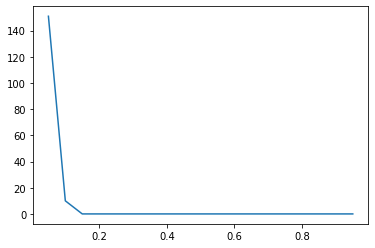

In [147]:
plt.plot(X, counter_list)
plt.show()

In [148]:
counter_list

[151, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Convergence in TV Distance

In [76]:
def TV(h, target):
    return np.sum(np.abs(h-1) * target)

In [162]:
n = 100
initial = uniform_distribution(n)
target = random_distribution(n)
h = initial / target

K = rand_kernel_matrix(n, 0.1)
L = K - np.identity(n)

In [163]:
gamma = spectral_gap(L, n)
gamma

0.4420041396062484

In [164]:
tv = TV(h, target)
tv

0.47910970172398615

In [165]:
(h >= 1).astype(int)

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [166]:
(h<1).astype(int)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [170]:
dirichlet = np.sum(((h >= 1).astype(int) - (h<1).astype(int)) * (L @ (h - 1)) * target)
dirichlet

-1.2885735136972738

In [168]:
dirichlet > -gamma * tv

False

In [177]:
for _ in range(1000):
    n = 100
    initial = uniform_distribution(n)
    target = random_distribution(n)
    h = initial / target

    K = rand_kernel_matrix(n, 0.1)
    L = K - np.identity(n)
    gamma = spectral_gap(L, n)
    
    tv = TV(h, target)
    dirichlet = np.sum(((h >= 1).astype(int) - (h<1).astype(int)) * (L @ (h-1)) * target)
    
    if dirichlet > 0:
        print('contradiction')

contradiction
contradiction
